### Thresholding for Chilikha Lake NDWI_LMC

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install rasterio

     |████████████████████████████████| 18.3MB 1.5MB/s 


In [ ]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Chilikha/'
image = Image.open(path + 'ndwi_lmc.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  print(i)
  grey_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
7

5490


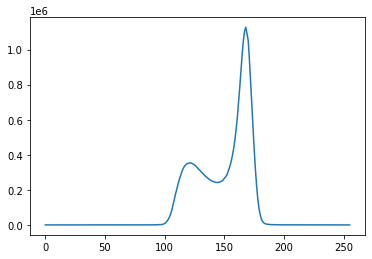

In [ ]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [ ]:
#Creating binary image array with threshold = 144
bin_image = []
threshold = 144

for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
    else:
      temp_row.append(0)

  print(i)
  bin_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
7

In [ ]:
#Generating Binary file of the binary image(numpy array)

file = open('chilikha_ndwi_lmc_binary_t144.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  print(i)

file.close()

Streaming output truncated to the last 5000 lines.
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
7

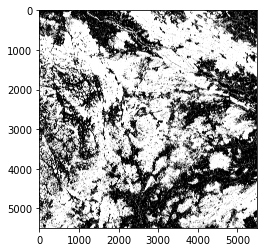

In [ ]:
#Plotting the binary image
import matplotlib.pyplot as plt
plt.imshow(bin_image,'gray')

In [ ]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('chilikha_ndwi_lmc_t144.png',bin_image,cmap='gray')

### Thresholding for Chilikha lake NDWI_WC

In [ ]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Chilikha/'
image = Image.open(path + 'ndwi_wc.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  print(i)
  grey_image.append(temp_row)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Streaming output truncated to the last 5000 lines.
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169

In [ ]:
grey_image_arr = np.array(grey_image)

10980


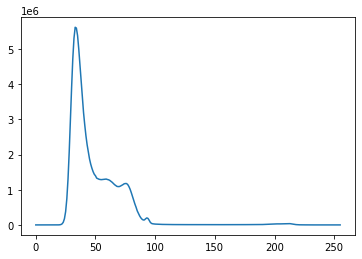

In [ ]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [ ]:
#Creating binary image array with threshold = 130
bin_image = []
threshold = 130


for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
    else:
      temp_row.append(0)

  print(i)
  bin_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169

In [ ]:
#Generating Binary file of the binary image(numpy array)

file = open('chilikha_ndwi_wc_binary_t130.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  print(i)

file.close()

Streaming output truncated to the last 5000 lines.
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169

KeyboardInterrupt: ignored

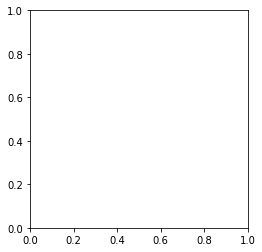

In [ ]:
#Plotting the binary image
import matplotlib.pyplot as plt
plt.imshow(bin_image,'gray')

In [ ]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('chilikha_ndwi_wc_t130.png',bin_image,cmap='gray')
print("saved")

saved


### Thresholding for Chilikha lake NDCI

In [ ]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Chilikha/'
image = Image.open(path + 'ndci.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  print(i)
  grey_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
7

5490


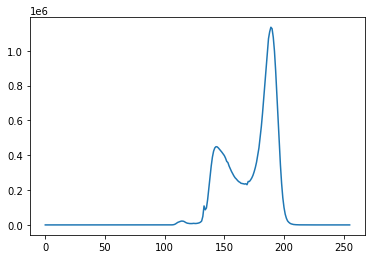

In [ ]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [ ]:
start = 150

while start < 255:
  if freq[start] < freq[start - 1]:
    if freq[start] < freq[start + 1]:
      break
  start = start + 1

print(start)

167


In [ ]:
#Creating binary image array with threshold = 167
bin_image = []
threshold = 167


for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
    else:
      temp_row.append(0)

  print(i)
  bin_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
7

In [ ]:
#Generating Binary file of the binary image(numpy array)

file = open('chilikha_ndci_binary_t167.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  print(i)

file.close()

Streaming output truncated to the last 5000 lines.
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
727
7

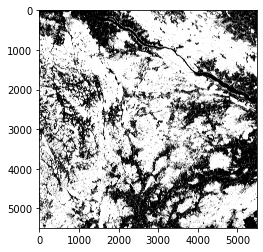

In [ ]:
#Plotting the binary image
import matplotlib.pyplot as plt
plt.imshow(bin_image,'gray')

In [ ]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('chilikha_ndci_t167.png',bin_image,cmap='gray')
print("saved")

saved


### Thresholding for Okeechobee lake NDWI_LMC

In [ ]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Okeechobee/'
image = Image.open(path + 'ndwi_lmc.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  print(i)
  grey_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
7

5490


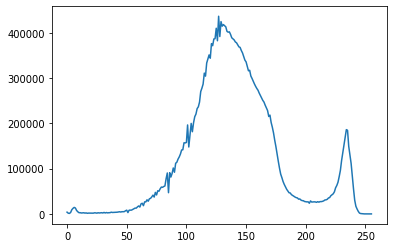

In [ ]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [ ]:
start = 175

while start < 255:
  if freq[start] < freq[start - 1]:
    if freq[start] < freq[start + 1]:
      break
  start = start + 1

print(start)

194


In [ ]:
#Creating binary image array with threshold = 194
bin_image = []
threshold = 194

for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
    else:
      temp_row.append(0)

  print(i)
  bin_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
7

In [ ]:
#Generating Binary file of the binary image(numpy array)

file = open('okeechobee_ndwi_lmc_binary_t194.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  print(i)

file.close()

Streaming output truncated to the last 5000 lines.
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
7

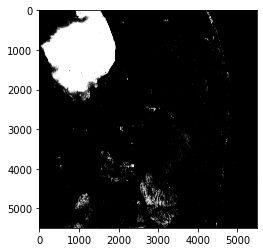

In [ ]:
#Plotting the binary image
import matplotlib.pyplot as plt
plt.imshow(bin_image,'gray')

In [ ]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('okeechobee_ndwi_lmc_t194.png',bin_image,cmap='gray')
print("saved")

saved


### Thresholding for Okeechobee lake NDWI_WC

In [ ]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Okeechobee/'
image = Image.open(path + 'ndwi_wc.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  print(i)
  grey_image.append(temp_row)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:2766: DecompressionBombWarning: Image size (120560400 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  DecompressionBombWarning,


Streaming output truncated to the last 5000 lines.
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169

In [ ]:
grey_image_arr = np.array(grey_image)

10980


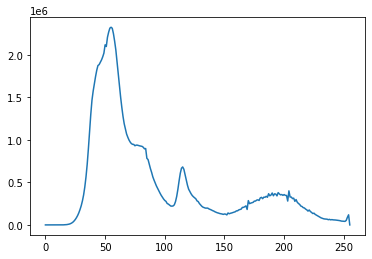

In [ ]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [ ]:
#Creating binary image array with threshold = 106
bin_image = []
threshold = 110


for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
    else:
      temp_row.append(0)

  print(i)
  bin_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169

In [ ]:
#Generating Binary file of the binary image(numpy array)

file = open('okeechobee_ndwi_wc_binary_t110.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  print(i)

file.close()

Streaming output truncated to the last 5000 lines.
5980
5981
5982
5983
5984
5985
5986
5987
5988
5989
5990
5991
5992
5993
5994
5995
5996
5997
5998
5999
6000
6001
6002
6003
6004
6005
6006
6007
6008
6009
6010
6011
6012
6013
6014
6015
6016
6017
6018
6019
6020
6021
6022
6023
6024
6025
6026
6027
6028
6029
6030
6031
6032
6033
6034
6035
6036
6037
6038
6039
6040
6041
6042
6043
6044
6045
6046
6047
6048
6049
6050
6051
6052
6053
6054
6055
6056
6057
6058
6059
6060
6061
6062
6063
6064
6065
6066
6067
6068
6069
6070
6071
6072
6073
6074
6075
6076
6077
6078
6079
6080
6081
6082
6083
6084
6085
6086
6087
6088
6089
6090
6091
6092
6093
6094
6095
6096
6097
6098
6099
6100
6101
6102
6103
6104
6105
6106
6107
6108
6109
6110
6111
6112
6113
6114
6115
6116
6117
6118
6119
6120
6121
6122
6123
6124
6125
6126
6127
6128
6129
6130
6131
6132
6133
6134
6135
6136
6137
6138
6139
6140
6141
6142
6143
6144
6145
6146
6147
6148
6149
6150
6151
6152
6153
6154
6155
6156
6157
6158
6159
6160
6161
6162
6163
6164
6165
6166
6167
6168
6169

In [ ]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('okeechobee_ndwi_wc_t110.png',bin_image,cmap='gray')
print("saved")

saved


### Thresholding for Okeechobee lake NDCI

In [ ]:
#Importing libraries
import rasterio as rio
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import math

#Converting TIFF file into a numpy array
path = '/content/drive/My Drive/Okeechobee/'
image = Image.open(path + 'ndci.tiff')
image_array = np.array(image)

# Converting array into corrosponding gray scale array
# grey_value = (255)(original_value + 1)/(max - min) max = 1 min = -1
grey_image = []

for i in range(image_array[0].shape[0]):
  temp_row = []
  for j in range(image_array[0].shape[0]):
    
    if(math.isnan(image_array[i][j])):
      grey_val = 255
    else:
      grey_val = int(math.floor(((image_array[i][j] + 1)*255)/2))
    temp_row.append(grey_val)
  
  print(i)
  grey_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
7

5490


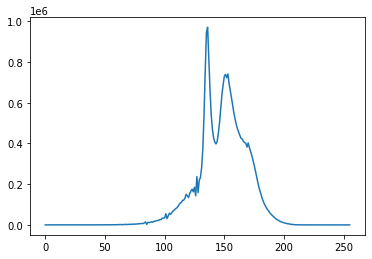

In [ ]:
#Plotting number of pixels vs greyvalue
freq = np.zeros(256)
grey_image_arr = np.array(grey_image)
print(len(grey_image_arr[0]))

for i in range(len(grey_image_arr[0])):
  for j in range(len(grey_image_arr[0])):
    freq[grey_image_arr[i][j]] = freq[grey_image_arr[i][j]] + 1

plt.plot(range(256),freq)

In [ ]:
start = 110

while start < 150:
  if freq[start] < freq[start - 1]:
    if freq[start] < freq[start + 1]:
      break
  start = start + 1

print(start)

120


In [ ]:
#Creating binary image array with threshold = 150
bin_image = []
threshold = 150


for i in range(len(grey_image_arr[0])):
  temp_row = []
  for j in range(len(grey_image_arr[0])):
    if grey_image_arr[i][j] >= threshold:
      temp_row.append(1)
    else:
      temp_row.append(0)

  print(i)
  bin_image.append(temp_row)

Streaming output truncated to the last 5000 lines.
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
7

In [ ]:
#Generating Binary file of the binary image(numpy array)

file = open('okeechobee_ndci_binary_t150.bin','wb')

for i in range(len(bin_image[0])):
  temp_row = bin_image[i]
  byte_arr = bytearray(temp_row)
  file.write(byte_arr)
  print(i)

file.close()

Streaming output truncated to the last 5000 lines.
490
491
492
493
494
495
496
497
498
499
500
501
502
503
504
505
506
507
508
509
510
511
512
513
514
515
516
517
518
519
520
521
522
523
524
525
526
527
528
529
530
531
532
533
534
535
536
537
538
539
540
541
542
543
544
545
546
547
548
549
550
551
552
553
554
555
556
557
558
559
560
561
562
563
564
565
566
567
568
569
570
571
572
573
574
575
576
577
578
579
580
581
582
583
584
585
586
587
588
589
590
591
592
593
594
595
596
597
598
599
600
601
602
603
604
605
606
607
608
609
610
611
612
613
614
615
616
617
618
619
620
621
622
623
624
625
626
627
628
629
630
631
632
633
634
635
636
637
638
639
640
641
642
643
644
645
646
647
648
649
650
651
652
653
654
655
656
657
658
659
660
661
662
663
664
665
666
667
668
669
670
671
672
673
674
675
676
677
678
679
680
681
682
683
684
685
686
687
688
689
690
691
692
693
694
695
696
697
698
699
700
701
702
703
704
705
706
707
708
709
710
711
712
713
714
715
716
717
718
719
720
721
722
723
724
725
726
7

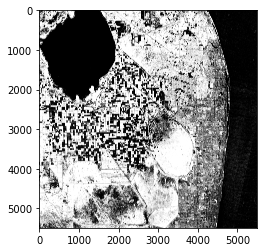

In [ ]:
#Plotting the binary image
import matplotlib.pyplot as plt
plt.imshow(bin_image,'gray')

In [ ]:
#Saving the Binary Image
import matplotlib
matplotlib.image.imsave('okeechobee_ndci_t150.png',bin_image,cmap='gray')
print("saved")

saved
